In [ ]:
%config InlineBackend.figure_format = 'retina'
from matplotlib import pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.font_manager as font_manager
import matplotlib as mpl
import matplotlib.patches as mp
import seaborn as sns
import pandas as pd
from hurry.filesize import size,si

In [25]:
CG = 'Rep2_fast5s.C.call_mods.CG_binsize100000.bedgraph'
CHG = 'Rep2_fast5s.C.call_mods.CHG_binsize100000.bedgraph'
CHH = 'Rep2_fast5s.C.call_mods.CHH_binsize100000.bedgraph'
chromosome = '4'
region_bed = '/public/home/lizw/data/IMPORTANT_genome/arabidopsis/tair10/all_chr.bed'

Text(0, 0.5, 'Methylation Level')

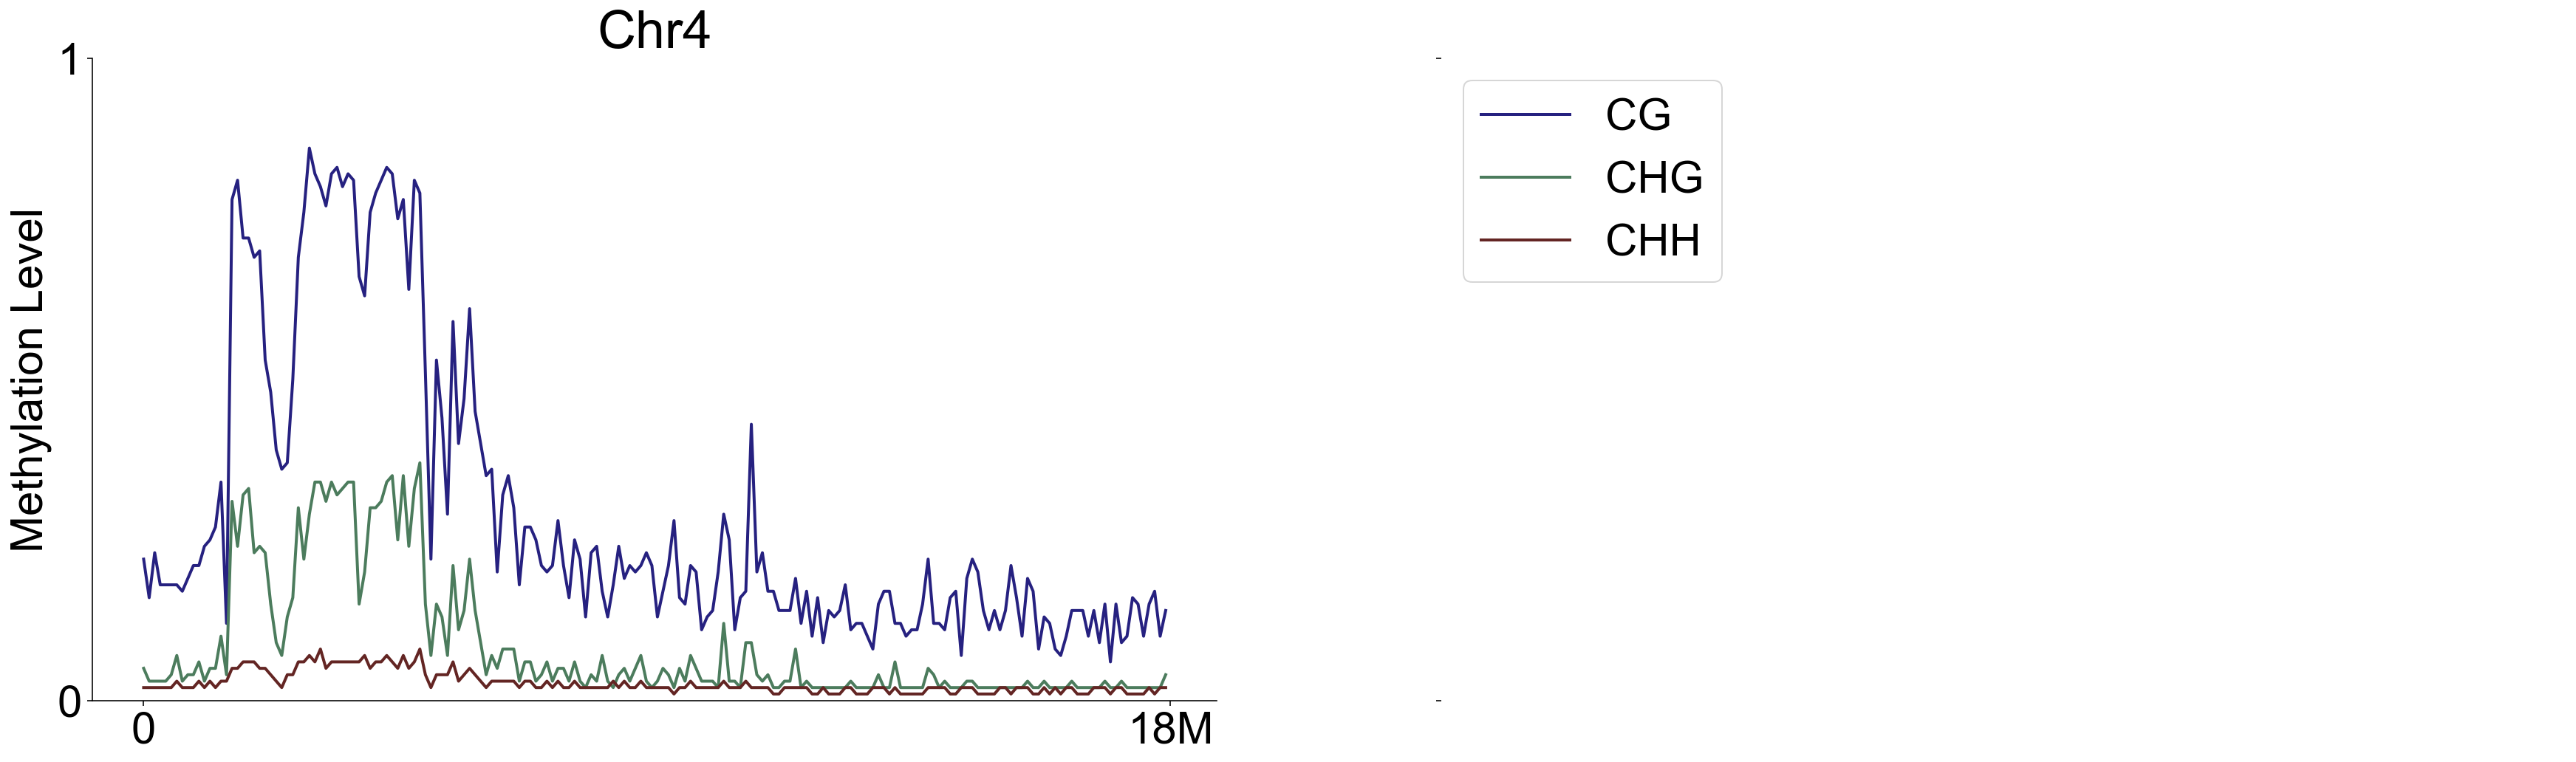

In [41]:
CG_table = pd.read_table(CG,names=['chrom','binstart','binend','met_level_final'],
                         header=None,
                         converters={'chrom':str,'binstart':int,'binend':int,'met_level_final':float})
CHG_table = pd.read_table(CHG,names=['chrom','binstart','binend','met_level_final'],
                         header=None,
                         converters={'chrom':str,'binstart':int,'binend':int,'met_level_final':float})
CHH_table = pd.read_table(CHH,names=['chrom','binstart','binend','met_level_final'],
                         header=None,
                         converters={'chrom':str,'binstart':int,'binend':int,'met_level_final':float})

region_df = pd.read_table(region_bed,header=None,names=['chrom','chr_start','chr_end'],
                            converters={'chrom':str,'chr_start':int,'chr_end':int},
                            index_col = 0)

region_df.index = region_df.index.astype('str')
chrom_size = region_df.loc[chromosome,'chr_end'] - region_df.loc[chromosome,'chr_start']


font_dirs = ['/public/home/mowp/test/fonts/']
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)

for font_file in font_files:
    font_manager.fontManager.addfont(font_file)

plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 30
plt.rcParams['svg.fonttype'] = 'none'
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(30,8), sharey=True)

color_list = ['#262180','#4C7C5D','#632523']

n = 0
for i in [CG_table,CHG_table,CHH_table]:
    ax_chr = ax[0]
    df = i.query('chrom == @chromosome')
    ax_chr.plot(df['binstart'], df['met_level_final'], color=color_list[n],lw=2)
    ax_chr.set_xticks([0, chrom_size])
    ax_chr.set_xticklabels([0, size(chrom_size, system=si)])
    ax_chr.title.set_text(f'Chr{chromosome}')
    sns.despine(ax=ax_chr)
    n += 1 

from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color='#262180', lw=2),
                Line2D([0], [0], color='#4C7C5D', lw=2),
                Line2D([0], [0], color='#632523', lw=2)]

ax[1].legend(custom_lines, ['CG','CHG','CHH'],loc='upper left')
ax[1].spines['right'].set_color('none')
ax[1].spines['bottom'].set_color('none')
ax[1].spines['left'].set_color('none')
ax[1].spines['top'].set_color('none')
ax[1].set_xticks([])
ax[1].set_yticks([])


plt.ylim(0, 1)
plt.yticks([0, 1])
ax[0].set_ylabel('Methylation Level')

# chr5子图横轴，最后自己手动加个 (Mb吧)
#plt.savefig('/public/home/lizw/task/pore_c/tools/from_wp/methylation_geno.png',format='png',dpi=300,bbox_inches='tight')